# Exercício computacional 2: Projeto de filtros

Alunos: 
- Davi Giordano Valério, 11805273
- Henrique Lefundes da Silva, 11808280


In [852]:
using DSP, Plots, LaTeXStrings, LinearAlgebra, Plots.PlotMeasures

In [853]:
# Definindo configurações padrões para todos os gráficos
graph_settings = (top_margin = 5mm,
    bottom_margin = 5mm,
    left_margin = 5mm,
    right_margin = 5mm,
    size = (750, 500));

# Item 1

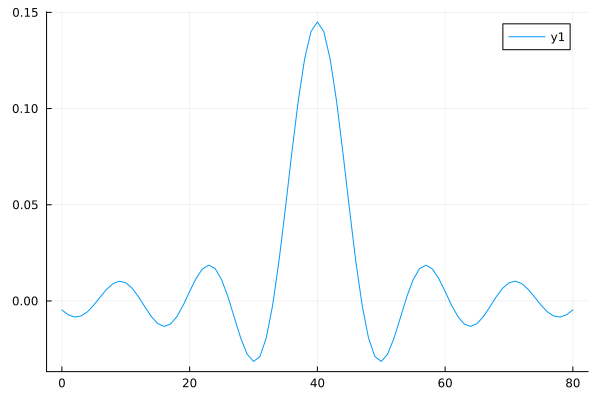

In [854]:
N = 81
n = 0:N-1
L = (N-1)/2
ωc = 29*π/200
hl = @. (ωc/π)*sinc((ωc/π)*(n-L))
plot(n, hl)

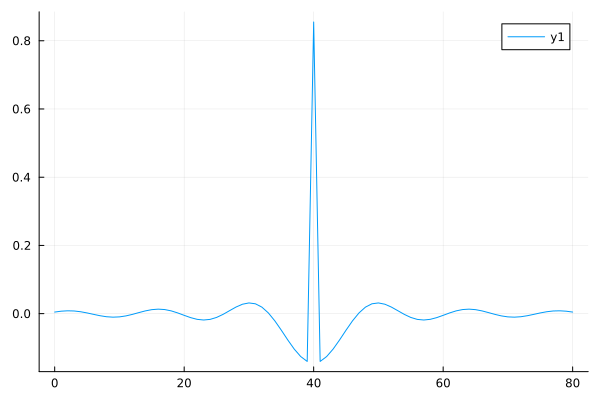

In [855]:
hh = @. sinc.(n.-L) - (ωc/π)*sinc((ωc/π)*(n-L)) # The sinc(n-L) works as an impulse 

plot(n, hh)

# Item 2

In [856]:
######################################
# Depreciated function,              #
# for loopp implementation is faster #
######################################
function conv(h, x)
    toeplitz = zeros(length(x) , length(x))

    for k in 1:length(x)
        toeplitz[k:(length(h)+k-1), k] = h
    end
    return toeplitz * x'
end

conv (generic function with 2 methods)

In [857]:
function conv(h::AbstractVector, x::AbstractVector)

    y = zeros(length(x))

    for n in 1:length(y)
        for k in 1:length(h)
            if (n - k + 1) > 0 && (n - k + 1) <= length(x)
                y[n] = y[n] + h[k]*x[n - k + 1]
            end
        end
    end

    return y
end

conv (generic function with 2 methods)

# Item 3

## a)

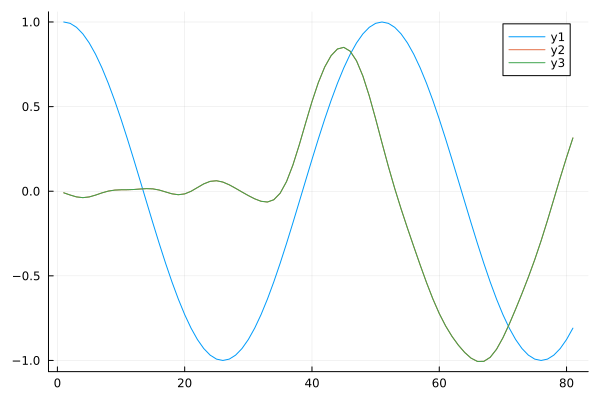

In [858]:
x = @. cos(π*n/25) + cos(π*n/4)

xfiltlow = filt(Hl, x)
xconvlow = conv(hl, x)

x1 = @. cos(π*n/25)

plot([x1 xfiltlow xconvlow])

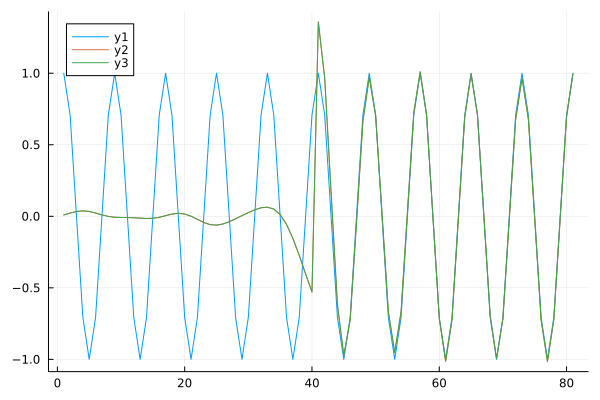

In [859]:
xfilthigh = filt(Hh, x)
xconvhigh = conv(hh, x)

x2 = @. cos(π*n/4)

plot([x2 xfilthigh xconvhigh])

## b)

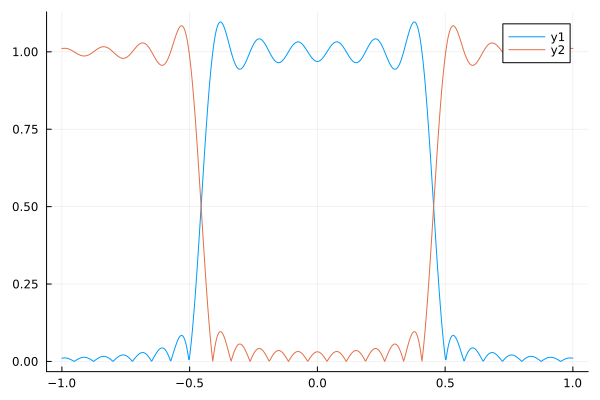

In [860]:
Hl = PolynomialRatio(hl, [1])
Hh = PolynomialRatio(hh, [1])
ω = range(-π, π, 1000)
HfreqLow = freqz(Hl, ω/π)
HfreqHigh = freqz(Hh, ω/π)
plot(ω/π, [abs.(HfreqLow) abs.(HfreqHigh)])

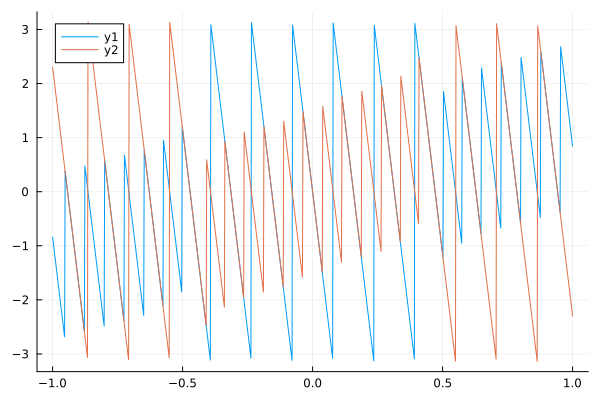

In [861]:
plot(ω/π, [angle.(HfreqLow) angle.(HfreqHigh)])

# Item 4 (Kaiser' Window)

In [862]:
function βkaiser(A)
    return A < 21 ? 0 : A ≤ 50 ? 0.5842(A-21)^0.4 + 0.07886(A-21) : 0.1102(A - 8.7)
end 

βkaiser (generic function with 1 method)

In [863]:
δp = 0.005
δr = 0.001

A = -20*log10(min(δp, δr))
β = βkaiser(A)

5.65326

## Passa-baixa

In [864]:
ωp = π/25
ωr = π/4
ωc = (ωp + ωr)/2

Nk = (A-8)/(2.285*(abs(ωr-ωp))) + 1
Nk = Int16(ceil(N))
Lk = (Nk-1)/2

n = 0:Nk-1
hlkaiser = hl.*kaiser(Nk, β/π);

### Resposta no tempo

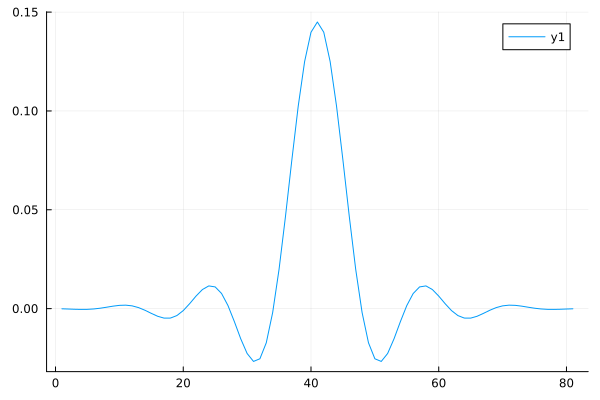

In [865]:
plot(hlkaiser)

### Resposta na frequência

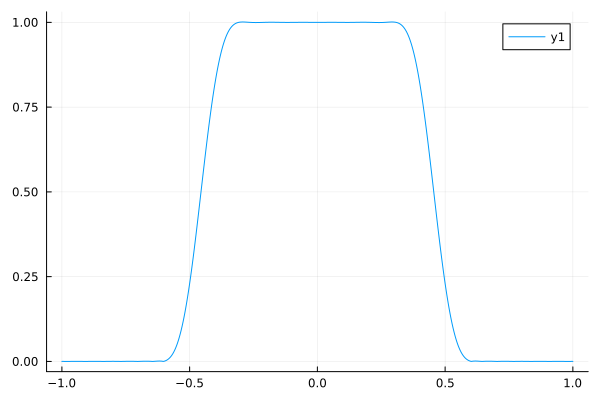

In [866]:
Hlkaiser = PolynomialRatio(hlkaiser, [1])
ω = range(-π, π, 1000)
Hlkaiser = freqz(Hlkaiser, ω/π)
plot(ω/π, abs.(Hlkaiser))

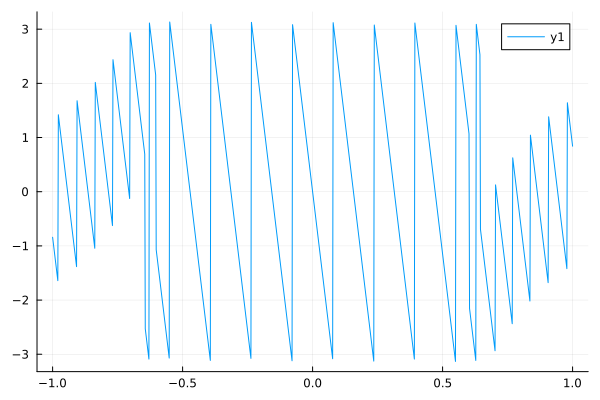

In [867]:
plot(ω/π, angle.(Hlkaiser))

### Sinal de saída

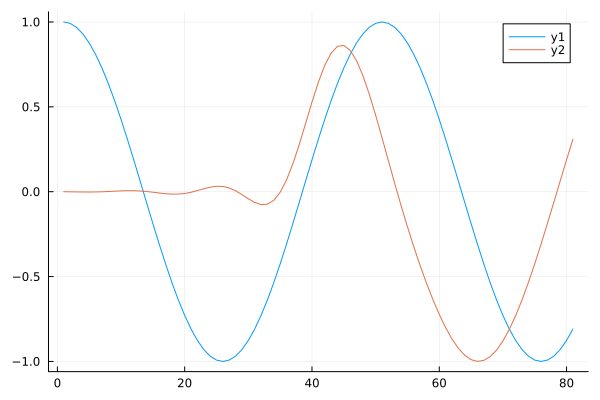

In [868]:
xkaiserlow = conv(hlkaiser, x)

plot([x1 xkaiserlow])

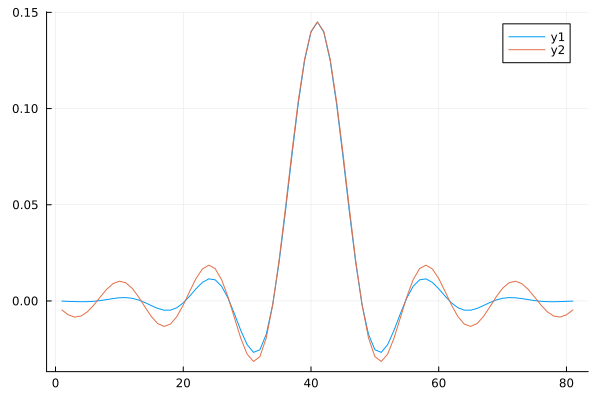

In [869]:
plot([hlkaiser hl])

## Passa-alta

In [870]:
ωp = π/4
ωr = π/25
ωc = (ωp + ωr)/2

Nk = (A-8)/(2.285*(abs(ωr-ωp))) + 1
Nk = Int16(ceil(N))
Lk = (Nk-1)/2

n = 0:Nk-1
hhkaiser = hh.*kaiser(Nk, β/π);

### Resposta no tempo

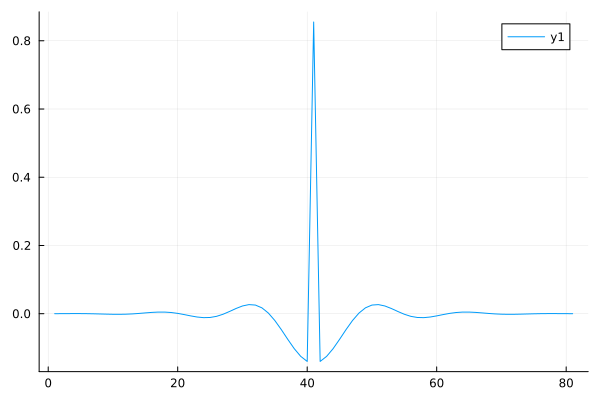

In [871]:
plot(hhkaiser)

### Resposta na frequência

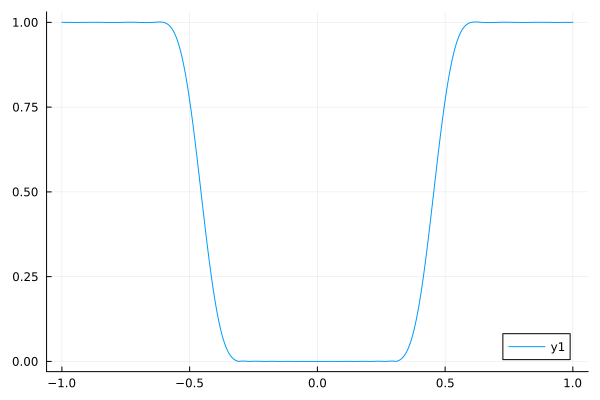

In [872]:
Hhkaiser = PolynomialRatio(hhkaiser, [1])
ω = range(-π, π, 1000)
Hhkaiser = freqz(Hhkaiser, ω/π)
plot(ω/π, abs.(Hhkaiser))

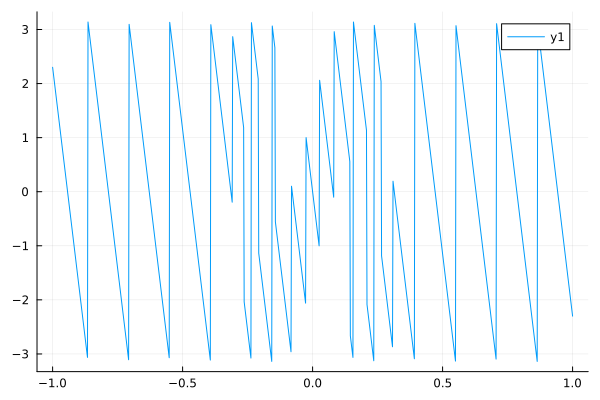

In [873]:
plot(ω/π, angle.(Hhkaiser))

### Sinal de saída

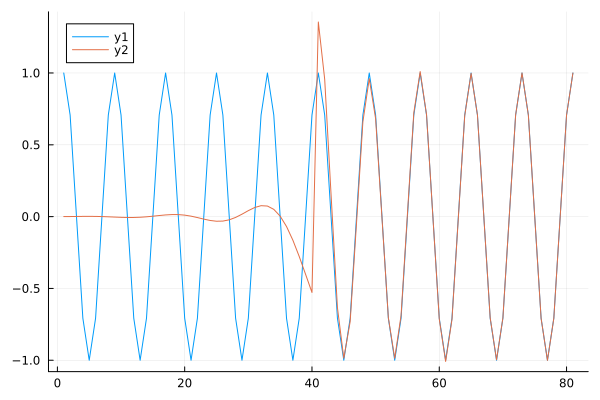

In [874]:
xkaiserhigh = conv(hhkaiser, x)

plot([x2 xkaiserhigh])

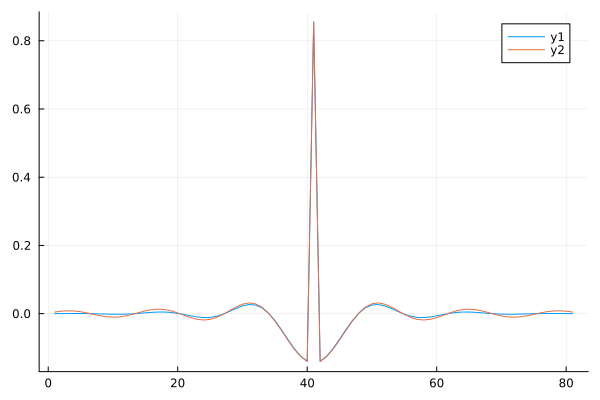

In [875]:
plot([hhkaiser hh])

# Item 5 [min-max (Parks-McClellan)]

## Passa-baixa

In [884]:
δp = 0.005
δr = 0.001

ωp = π/25
ωr = π/4

Nmm = ceil(Int,(-10*log10(δp*δr)-13)/(2.324*(abs(ωr-ωp)))) + 3

println(Nmm)

hlminmax = remez(Nmm, [(0, ωp/π) => (1, 1), (ωr/π, 1) => (0, δp/δr)]; Hz = 2)

30


30-element Vector{Float64}:
 -0.0009412258124797421
 -0.002402474508898725
 -0.004735534358544534
 -0.007544544610729283
 -0.009976284820815197
 -0.010681395411053868
 -0.008018620554494496
 -0.0004422738517846853
  0.013009611299134473
  0.032262028113742354
  ⋮
  0.013009611299134473
 -0.0004422738517846853
 -0.008018620554494496
 -0.010681395411053868
 -0.009976284820815197
 -0.007544544610729283
 -0.004735534358544534
 -0.002402474508898725
 -0.0009412258124797421

### Resposta no tempo

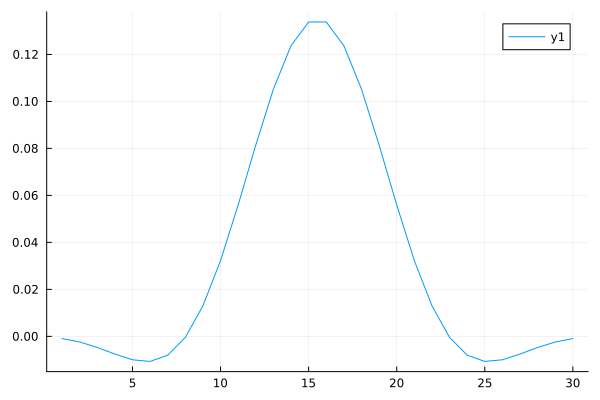

In [877]:
plot(hminmax)

### Resposta na frequência

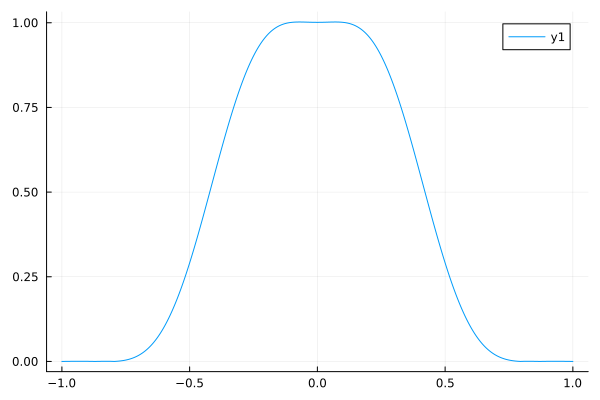

In [878]:
Hlminmax = PolynomialRatio(hlminmax, [1])
ω = range(-π, π, 1000)
Hlminmax = freqz(Hlminmax, ω/π)
plot(ω/π, abs.(Hlminmax))

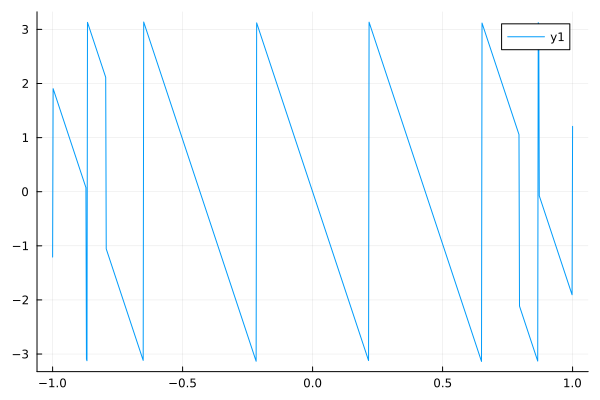

In [879]:
plot(ω/π, angle.(Hlminmax))

### Sinal de Saída

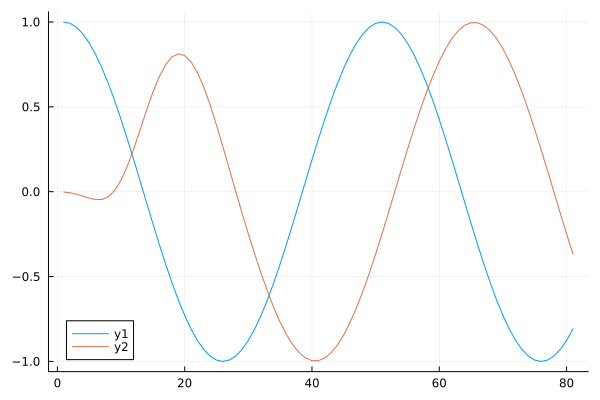

In [880]:
xminmaxlow = conv(hlminmax, x) 

plot([x1 xminmaxlow])

## Passa-alta

In [899]:
δp = 0.005
δr = 0.001

ωp = π/4
ωr = π/25

Nmm = ceil(Int,(-10*log10(δp*δr)-13)/(2.324*(abs(ωr-ωp)))) + 3

println(Nmm)

hhminmax = remez(Nmm, [(0, ωr/π) => (0, δp/δr), (ωp/π, 1) => (1, 1)]; Hz = 2)

30


30-element Vector{Float64}:
  0.7088665524558869
  0.7296085926432953
  0.9030878444165718
  0.6968396813723373
  0.28575277866426196
 -0.5423676013764538
 -1.3533048035645325
 -2.201576748715507
 -2.4889072230014966
 -2.4049339956652087
  ⋮
 -2.4889072230014966
 -2.201576748715507
 -1.3533048035645325
 -0.5423676013764538
  0.28575277866426196
  0.6968396813723373
  0.9030878444165718
  0.7296085926432953
  0.7088665524558869

### Resposta no tempo

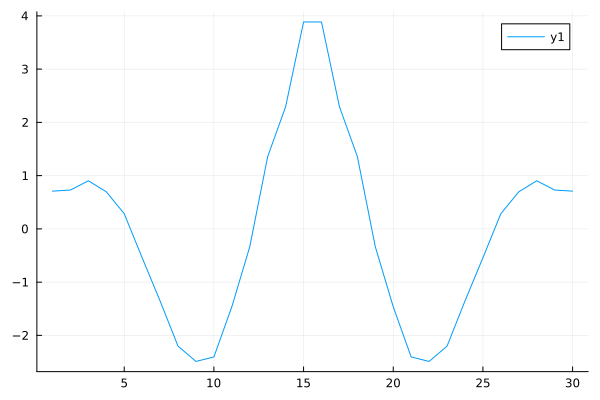

In [900]:
plot(hhminmax)

### Resposta na frequência

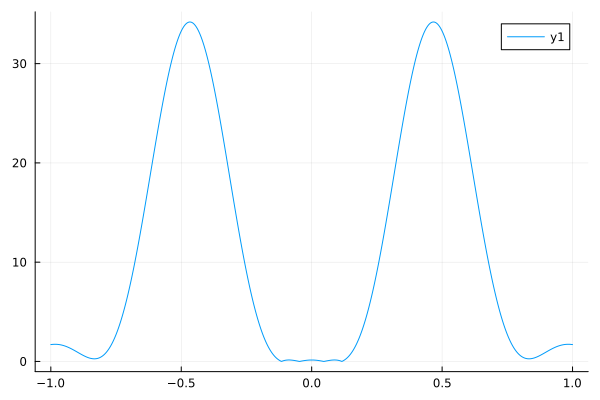

In [901]:
Hhminmax = PolynomialRatio(hhminmax, [1])
ω = range(-π, π, 1000)
Hhminmax = freqz(Hhminmax, ω/π)
plot(ω/π, abs.(Hhminmax))